In [32]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
k = 2
order = 4
lower, upper = -5, 10

In [21]:
(order + 1) ** k

25

In [22]:
def get_c(order, repeat):
    return np.array(list(itertools.product(range(order+1), repeat=k)))

In [23]:
c = get_c(order, k)

In [24]:
def get_fourier_feature_vector(state_vector, lower, upper, order):
    state_vector = (state_vector - lower) / (upper - lower)
    k = len(state_vector)
    c = get_c(order, k) # each row of c contains one way of interaction
    dot_products = state_vector.T @ c.T  # each column of c contains one way of interaction
    return np.cos(np.pi * dot_products)

In [25]:
fourier_feature_vectors = []
for s1 in np.arange(lower, upper, (upper-lower)/100):
    for s2 in np.arange(lower, upper, (upper-lower)/100):
        fourier_feature_vectors.append(
            get_fourier_feature_vector(np.array([[s1], [s2]]), lower=lower, upper=upper, order=order)
        )

In [26]:
fourier_feature_vectors = np.squeeze(np.array(fourier_feature_vectors))

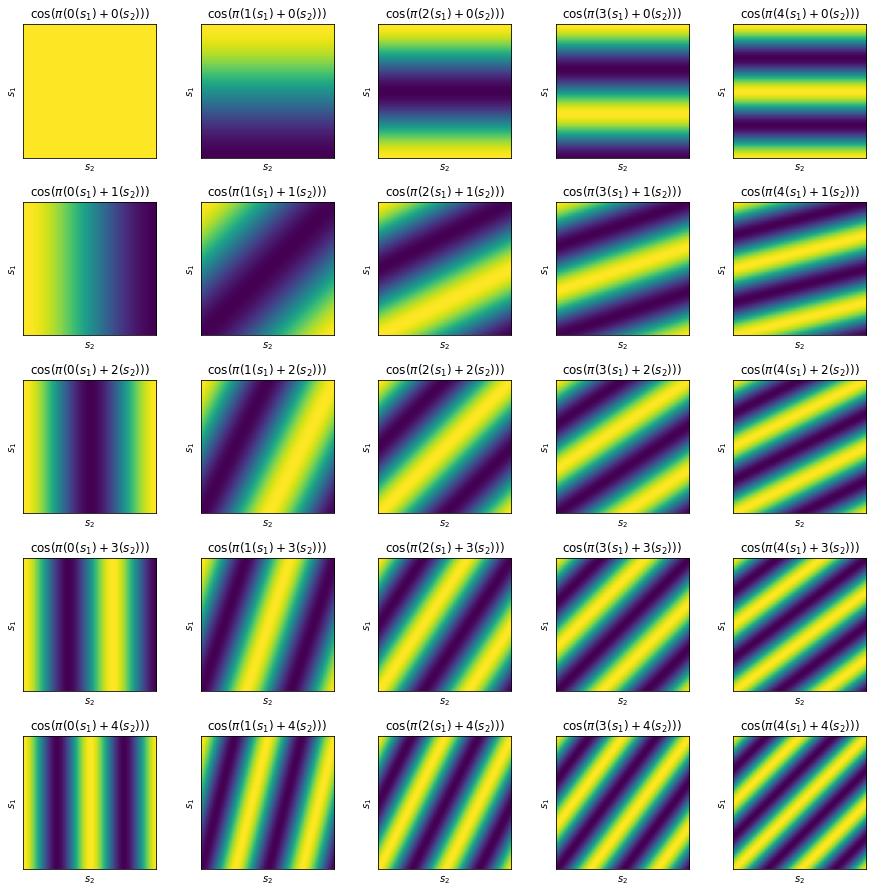

In [31]:
ncols = order + 1
nrows = order + 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 2.5, nrows * 2.5))
for i, ax in enumerate(axs.T.ravel()):  # since the loop 2 cells above first goes over all xs (cols)
    ax.imshow(fourier_feature_vectors[:,i].reshape(100, 100), origin='upper', cmap='viridis', vmax=1, vmin=-1)
    ax.set_title(fr'$\cos(\pi ({c[i][0]}(s_1) + {c[i][1]}(s_2)))$')
    ax.set_xlabel(r'$s_2$'); ax.set_ylabel(r'$s_1$')
    ax.set_xticks([]); ax.set_yticks([])
# plt.suptitle(f'Fourier features ({order}th order)', y=0.90)
plt.tight_layout()
plt.savefig('fourier_features.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)